In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.io import arff

# ___Introduction To Generalized Linear Mixed Models (GLMM)___
------------------

___Practiced using [UCLA material](https://stats.oarc.ucla.edu/other/mult-pkg/introduction-to-generalized-linear-mixed-models/)___

In [3]:
# GLMMs are extension to Linear Mixel Models (LMMs) that accomodate variables from different distributions e.g. binary distribution
# Or one could think of GLMMs as an extension to GLMs like linear regression that accomodate both fixed and random effects.

In [4]:
# The general form of a model is 

# ___$y = \beta X + uZ + \varepsilon$___

In [1]:
# where y is a N x 1 column vector (the outcome variable). (i.e in layman terms, a one dimensional array with N values)

# X is a N x p matrix of p number of predictor variables (i.e a matrix with N rows and p columns)
# beta is a p x 1 column vector of fixed effect regression coefficients (of the predictor variables, i.e a one dimensional array of N size)
# the highlight here is that betas are FIXED EFFECT REGRESSION COEFFICIENTS, one coefficient for each column in X

# Z is a N x q matrix of random effects, random complements to the FIXED EFFECTS X (N rows, q columns)
# again, the highlight here is that thse are RANDOM EFFECTS
# u is a q x 1 column vector of random effect coefficients, the random complements to the FIXED EFFECT betas.

# epsilon is N x 1 column vector of residuals, THE PART OF Y THAT CANNOT BE EXPLAINED BY THE MODEL:

# ___$y = \beta X + uZ$___

In [ ]:
# OR SIMPLY THE ERROR VALUES.

# the dimensionality of the equation is as follows;

## ___$\overbrace{y}^{N \times 1} = \overbrace{\underbrace{\beta}_{p \times 1}\underbrace{Z}_{N \times p}}^{N \times 1} + \overbrace{\underbrace{u}_{q \times 1} \underbrace{Z}_{N \times q}}^{N \times 1} + \overbrace{\varepsilon}^{N \times 1}$___

In [2]:
# let's comsider a synthesized data of 407 doctors (Q)
# not all doctors see the same number of patients, number of patients seen by each doctor could vary between from just 2 to 40. 
# (this number is denoted as n_{i})
# the average number of patients examined by a doctor is 21 (given)

# following equation gives the total number of patients seen by all the doctors,

# ___$$N = \sum_{i = 0}^{Q}{n_i}$$___

___According to:___

# ___$N = \sum_{i = 0}^{Q}{n_i}$___

In [6]:
avpatients = 21  # not accurate
ndocs = 407

# the total patients examined by 407 doctors were 8525

npatients = 8525
npatients

8525

In [8]:
# Context:

# our outcome y, mobility scores is a continuous variable
# we have 6 fixed effect predictors (FEP).

# FEP0 - age in years
# FEP1 - married (0/1)
# FEP2 - sex (0 - f/ 1 - m)
# FEP3 - RBC count
# FEP4 - WBC count
# FEI - a fixed effect intercept for every patient

# random effect predictors
# ...
# REI - random intercept for every doctor

In [3]:
# for the sake of simplicity let's maintain that all our effect intercepts are fixed except the random effect intercept
# the reason for allowing variability in random intercept is that we expect that mobility scores of patients seeing a given doctor may show a 
# higher degree of correlation compared to mobility scores of two randomly sampled patients.
# this is assumed because doctors often specialize in certain areas of medicine that deals with very specific ailments, that often brings patients of 
# similar nature to their desks
# for example the WBC and RBC counts might be concertedly abnormal in patients seeing a blood cancer specialist
# so the degree of homogeneity within patients seeing a doctor might be greater than that between two patients seeing two different doctors.

In [4]:
# to show this in matrix notation

# $$y = \beta X + uZ + \varepsilon$$
# $$\overbrace{y}^{8525 \times 1} = \overbrace{\underbrace{\beta}_{6 \times 1} \underbrace{X}_{8525 \times 6}}^{8525 \times 1} + \overbrace{\underbrace{u}_{407 \times 1}~\underbrace{Z}_{8525 \times 407}}^{8525 \times 1} + \overbrace{\varepsilon}^{8525 \times 1}$$

In [7]:
# Z is a matrix that encodes which doctor a patient belongs to.
# practically like a one hot encoded matrix where every value in a row will be 0 except one 1, registering the doctor.
# it's a sparse matrix (a matrix where most values are zeroes)

# beta is a vector that includes 6 regression coefficients: 5 for the five fixed effect predictors and one for the fixed effect intercept

In [2]:
z = np.zeros(shape = (8525, 407), dtype = np.uint8)
z.shape

(8525, 407)

In [3]:
pos = np.arange(0, 407)
for row in z:
    row[np.random.choice(pos)] = 1

In [4]:
z.sum(axis = 1)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint32)

In [5]:
z.sum(axis = 0)

array([28, 23, 22, 19, 17, 17, 26, 26, 23, 24, 14, 23, 18, 23, 27, 12, 22,
       28, 23, 16, 28, 21, 23, 20, 15, 16, 18, 22, 12, 14, 16, 23, 20, 16,
       23, 17, 12, 25, 21, 25, 16, 20, 32, 23, 22, 23, 26, 20, 19, 19, 20,
       30, 14, 19, 15, 20, 23, 21, 24, 20, 19, 16, 14, 21, 18, 17, 27, 20,
       25, 22, 19, 13, 17, 14, 26, 12, 23, 22, 28, 30, 31, 30, 21, 16, 28,
       21, 29, 15, 20, 17, 21, 13, 13, 22, 24, 15, 21, 31, 19, 18, 22, 18,
       26, 23, 30, 19, 26, 20, 25, 23, 22, 22, 22, 21, 16, 26, 20, 18, 30,
       16, 24, 15, 28, 28, 25, 23, 12, 23, 18, 26, 29, 18, 18, 22, 28, 22,
       14, 19, 17, 25, 26, 21, 19, 27, 21, 17, 19, 21, 22, 22, 18, 26, 21,
       20, 17, 23, 19, 14, 18, 29, 14, 16, 26, 18, 16, 22, 22, 22, 23, 32,
       20, 25, 23, 26, 27, 20, 19, 19, 19, 15, 20, 20, 24, 15, 28, 14, 34,
       18, 28, 16, 19, 15, 19, 13, 23, 31, 19, 18,  9, 21, 15, 28, 21, 21,
       23, 18, 18, 18, 22, 22, 26, 29, 25, 22, 20, 15, 21, 16, 18, 22, 20,
       22, 17, 25, 14, 27

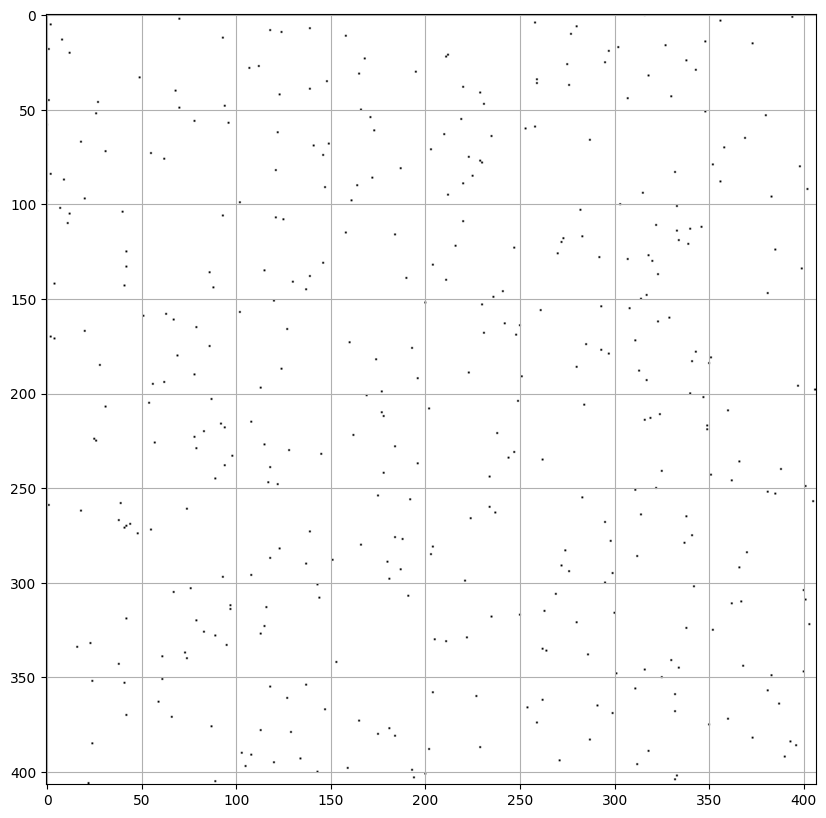

In [6]:
# let's examine the first 407 rows only

fig, axes = plt.subplots()
fig.set_size_inches(10, 10)
axes.imshow(z[:407, :], cmap = "binary")
axes.grid()
plt.show()

# the sporadic black dots denote 1

In [7]:
# to put the matrix equation in an easily digestible format;

### $$X = \begin{bmatrix}
age & married & sex & RBC & WBC & intercept \\
34 & 1 & 1 & 4232 & 65 & 1.2 \\
76 & 0 & 0 & 6534 & 28.75 & 4.3 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
17 & 0 & 1 & 6237 & 43.6 & 2 \\
56 & 1 & 0 & 2891 & 23.34 & 3.08 \\
\end{bmatrix}^{1}_{8525}$$

### $$Z = \begin{bmatrix}
d0 & d1 & d2 & \dots & d407 \\
1 & 0 & 0 & \dots & 0 \\
0 & 0 & 0 & \dots & 0 \\
0 & 1 & 0 & \dots & 0 \\
0 & 0 & 0 & \dots & 1 \\
\end{bmatrix}^{1}_{8525}$$

In [9]:
# The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an
# Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city.
# Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality
# chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx)
# and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept 
# and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors 
# concentration estimation capabilities. Missing values are tagged with -200 value.

# This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

In [22]:
aqual = pd.read_csv(r"./AirQualityUCI.csv", sep = ';', parse_dates = True)

In [23]:
aqual.Date + ' ' + aqual.Time

0       10/03/2004 18.00.00
1       10/03/2004 19.00.00
2       10/03/2004 20.00.00
3       10/03/2004 21.00.00
4       10/03/2004 22.00.00
               ...         
9352    04/04/2005 10.00.00
9353    04/04/2005 11.00.00
9354    04/04/2005 12.00.00
9355    04/04/2005 13.00.00
9356    04/04/2005 14.00.00
Length: 9357, dtype: object

In [24]:
pd.to_datetime(aqual.Date + ' ' + aqual.Time, format = "%d/%m/%Y %H.%M.%S", dayfirst = True)

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Length: 9357, dtype: datetime64[ns]

In [25]:
aqual.Time = pd.to_datetime(aqual.Date + ' ' + aqual.Time, format = "%d/%m/%Y %H.%M.%S", dayfirst = True)
aqual.drop("Date", axis = 1, inplace = True)

In [28]:
aqual.Time

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: Time, Length: 9357, dtype: datetime64[ns]